In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

In [65]:
churn_data = pd.read_csv(r'c:\Users\Administrator.DESKTOP-8R20EE2\Documents\sf_data_science\PY_13_Python_Visualization\data\churn.csv')
churn_data.drop(columns=['RowNumber'],inplace=True)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


Задание 9.1

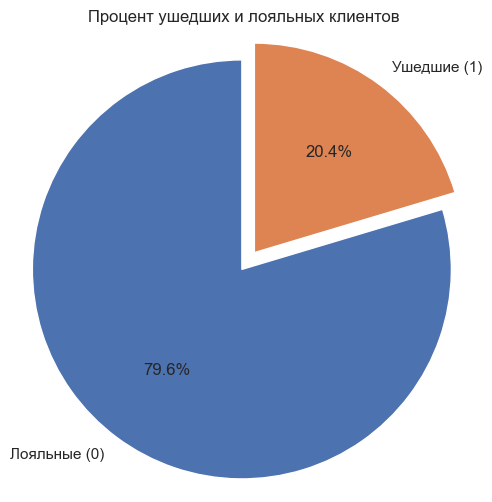

In [67]:
client_status = churn_data['Exited'].value_counts()
labels = ['Лояльные (0)', 'Ушедшие (1)']

# Построение круговой диаграммы со стандартными цветами
plt.figure(figsize=(6, 6))
plt.pie(client_status, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Процент ушедших и лояльных клиентов')
plt.axis('equal')  # Округление формы

plt.show()

На круговой диаграмме показано процентное распределение:

Лояльные клиенты составляют 79.6%

Ушедшие клиенты — 20.4%

Задание 9.2

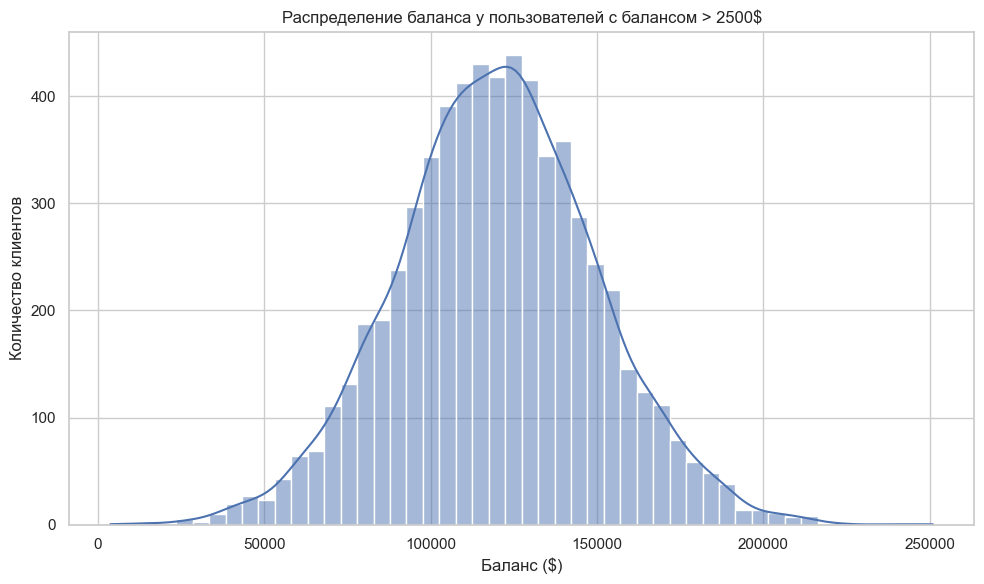

In [68]:
filtered = churn_data[churn_data['Balance'] > 2500]

# Построение гистограммы распределения баланса
plt.figure(figsize=(10, 6))
sns.histplot(filtered['Balance'], bins=50, kde=True)
plt.title('Распределение баланса у пользователей с балансом > 2500$')
plt.xlabel('Баланс ($)')
plt.ylabel('Количество клиентов')
plt.grid(True)
plt.tight_layout()
plt.show()

Комментарий:

На графике видно, что у большинства клиентов с балансом больше 2500 долларов сумма на счету обычно находится в пределах от 75 000 до 150 000. Есть небольшой пик ближе к нулю — это те, у кого недавно появились деньги на счету или они что-то сняли. Распределение не ровное, а с "волнами", то есть есть группы с разными уровнями баланса.

Вывод:

Клиенты с большим балансом — это, возможно, важные для банка люди, с которыми стоит работать по-особенному. Например, предлагать им специальные условия или продукты, так как они хранят у банка крупные суммы.

Задание 9.3

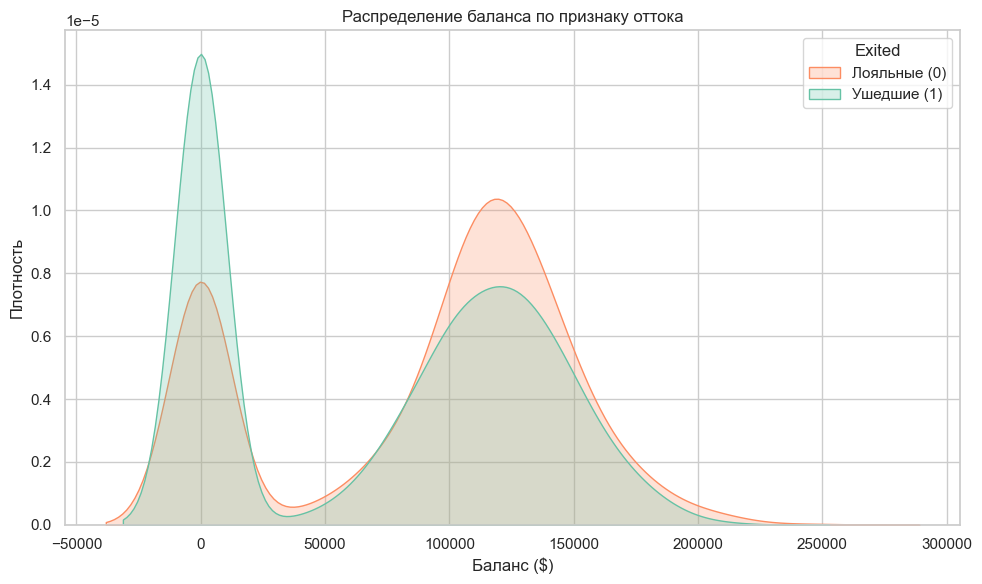

In [69]:
# Построение графика распределения баланса с разбивкой по оттоку
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churn_data, x='Balance', hue='Exited', common_norm=False, fill=True, palette='Set2')
plt.title('Распределение баланса по признаку оттока')
plt.xlabel('Баланс ($)')
plt.ylabel('Плотность')
plt.xticks(rotation=0)
plt.legend(title='Exited', labels=['Лояльные (0)', 'Ушедшие (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()

На графике показано, как различаются суммы на счетах у тех, кто остался в банке, и у тех, кто ушёл:

У лояльных клиентов больше людей с нулевым или очень маленьким балансом.

У ушедших клиентов заметно больше тех, у кого на счету крупные суммы, особенно в диапазоне от 100 000 до 150 000 долларов.

Вывод:

Клиенты с большими деньгами чаще уходят. Возможно, их что-то не устраивает:
— может, им не нравится обслуживание,
— или банк не предлагает им выгодные условия,
— или нет интересных продуктов для клиентов с высокими доходами.

Такие клиенты — ценные для банка, и за них стоит побороться. Возможно, им просто не хватило внимания или предложений по инвестициям, сбережениям или премиальному обслуживанию.

Задание 9.4

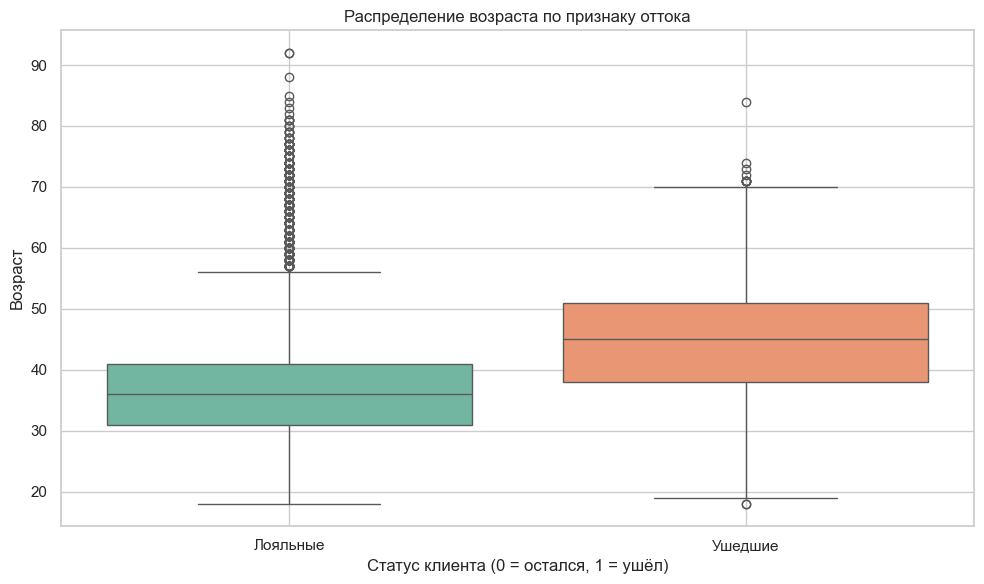

In [70]:
# Построение графика распределения возраста с разбивкой по оттоку
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_data, x='Exited', y='Age', hue='Exited', palette='Set2', legend=False)
plt.title('Распределение возраста по признаку оттока')
plt.xlabel('Статус клиента (0 = остался, 1 = ушёл)')
plt.ylabel('Возраст')
plt.xticks([0, 1], ['Лояльные', 'Ушедшие'])
plt.grid(True)
plt.tight_layout()
plt.show()

Комментарий:
У лояльных клиентов (тех, кто остался) возраст чаще всего в районе 35–45 лет, и у них почти нет выбросов — возраст распределён более равномерно.

У ушедших клиентов видно, что средний возраст выше, и встречаются выбросы в сторону 60+ лет.

Также видно, что разброс возраста у ушедших шире — то есть уходит больше людей разного возраста, особенно после 45 лет.

Вывод:
Больше потенциальных выбросов по возрасту — среди ушедших клиентов, особенно в группе старше 50 лет.

Банку стоит обратить внимание на клиентов 45+ лет — именно они чаще всего уходят. Возможно, этой возрастной категории не хватает понятных цифровых сервисов, удобства, или им не предлагают подходящих условий. Стоит подумать о продуктах и коммуникации, ориентированных на зрелую аудиторию.

Задание 9.5

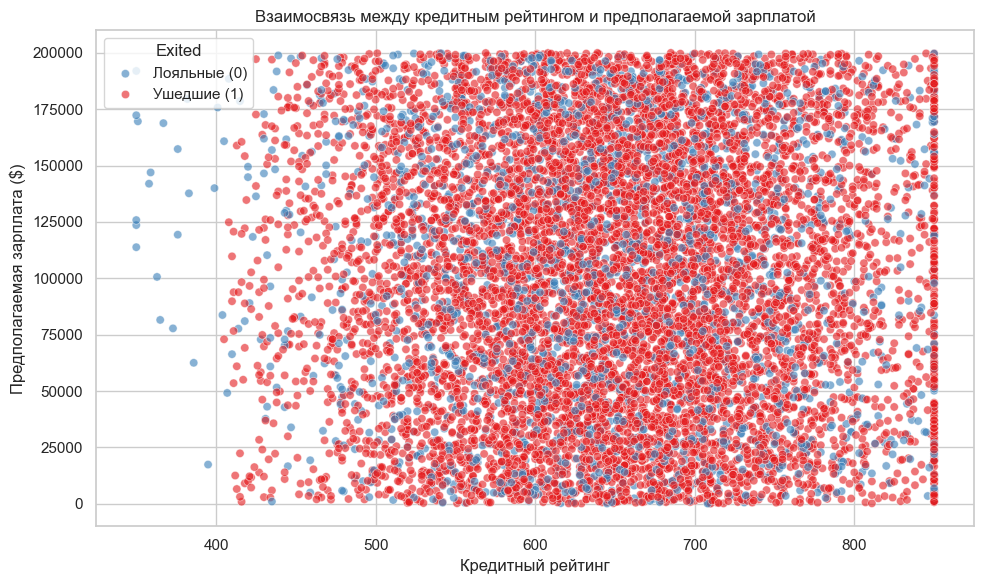

In [71]:
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(data=churn_data, x='CreditScore', y='EstimatedSalary', hue='Exited', palette='Set1', alpha=0.6)
plt.title('Взаимосвязь между кредитным рейтингом и предполагаемой зарплатой')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая зарплата ($)')
plt.legend(title='Exited', labels=['Лояльные (0)', 'Ушедшие (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()

Комментарий:
На графике нет чёткой зависимости между зарплатой и кредитным рейтингом. Зарплаты у клиентов разбросаны случайно по всему диапазону кредитных рейтингов — и у людей с низким рейтингом могут быть высокие доходы, и наоборот.

Также ушедшие и лояльные клиенты распределены примерно равномерно — не видно, чтобы кто-то конкретно уходил при высоком или низком доходе или рейтинге.

Вывод:
Явной взаимосвязи между кредитным рейтингом и зарплатой не наблюдается.
Также признак оттока не зависит напрямую от этих двух параметров по отдельности — вероятно, для оттока важны другие факторы или их комбинации (например, возраст, активность, количество продуктов и т.п.).

Задание 9.6

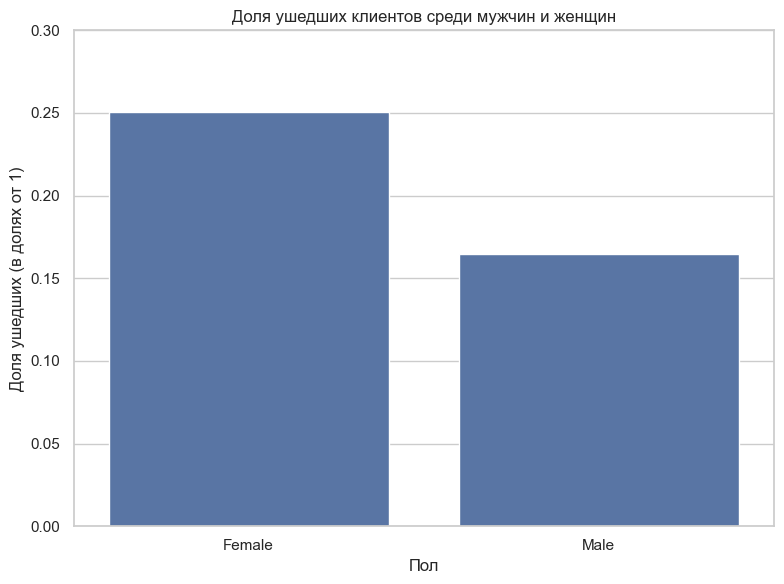

In [95]:
# Вычисление среднего значения столбца "Exited" для каждой группы по полу
gender_rate = churn_data.groupby(
    by='Gender'
)[['Exited']].mean().reset_index()

# Построение графика
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_rate, x='Gender', y='Exited')
plt.title('Доля ушедших клиентов среди мужчин и женщин')
plt.ylabel('Доля ушедших (в долях от 1)')
plt.xlabel('Пол')
plt.ylim(0, 0.3)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Задание 9.7

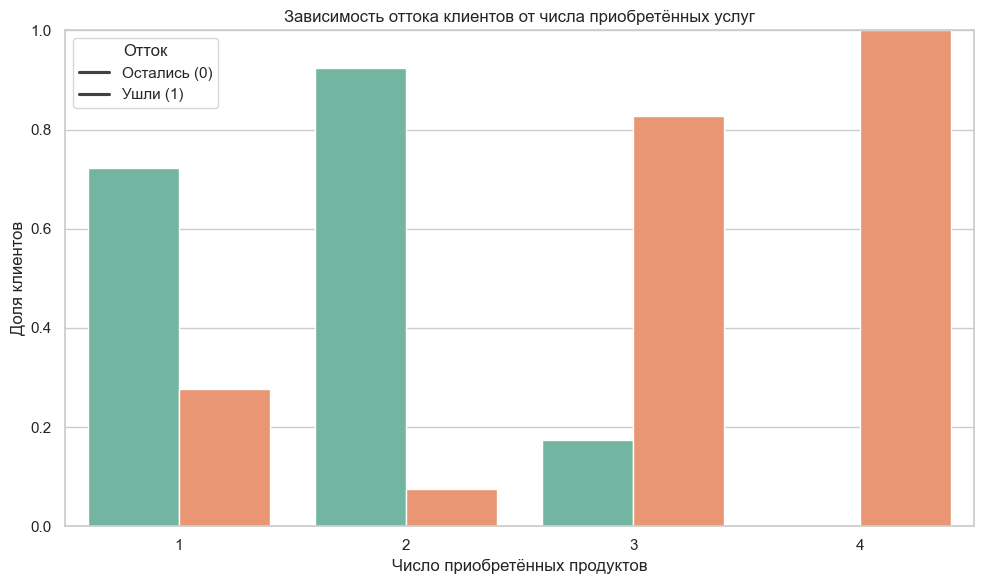

In [102]:
# Подсчёт долей ушедших и оставшихся клиентов по числу продуктов
product_churn = churn_data.groupby(['NumOfProducts', 'Exited']).size().reset_index(name='Count')

# Приведение данных к процентам внутри каждой группы NumOfProducts
product_totals = product_churn.groupby('NumOfProducts')['Count'].transform('sum')
product_churn['Percent'] = product_churn['Count'] / product_totals

# Построение многоуровневой столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(data=product_churn, x='NumOfProducts', y='Percent', hue='Exited', palette='Set2')
plt.title('Зависимость оттока клиентов от числа приобретённых услуг')
plt.xlabel('Число приобретённых продуктов')
plt.ylabel('Доля клиентов')
plt.legend(title='Отток', labels=['Остались (0)', 'Ушли (1)'])
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Комментарий:
Клиенты, у которых 1 или 2 продукта, чаще всего остаются.

Резкий рост оттока наблюдается среди клиентов с 3 продуктами — они почти все уходят.

У клиентов с 4 продуктами — наоборот, почти все остаются (вероятно, это привилегированные или корпоративные клиенты).

Вывод:
Отток резко увеличивается среди клиентов с 3 продуктами. Возможно, эта категория клиентов сталкивается с перегрузкой, навязанными услугами или не получает достаточной выгоды за расширение пакета. Банку стоит проанализировать предложения для таких клиентов — и понять, почему именно они уходят чаще всего.

Задание 9.8

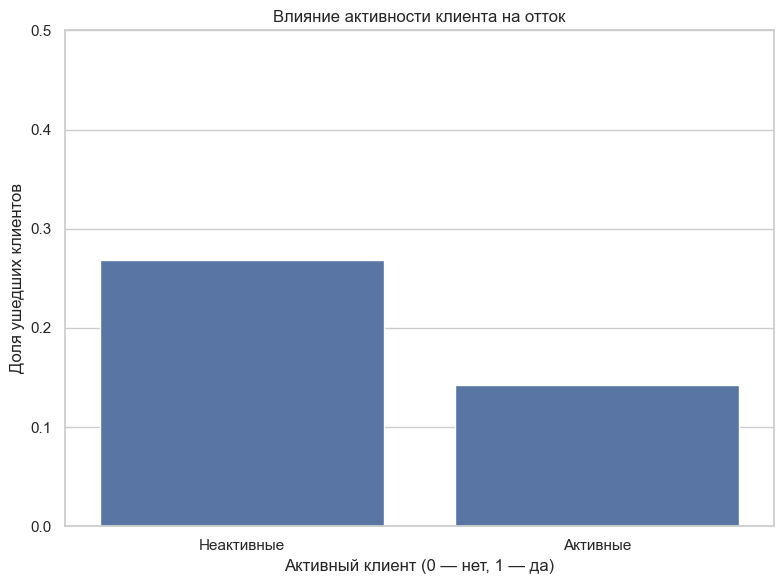

In [103]:
# Группировка: среднее значение Exited показывает долю ушедших
active_churn = churn_data.groupby('IsActiveMember')['Exited'].mean().reset_index()

# Столбчатая диаграмма без кастомных цветов
plt.figure(figsize=(8, 6))
sns.barplot(
    data=active_churn,
    x='IsActiveMember',
    y='Exited'
)

plt.title('Влияние активности клиента на отток')
plt.xlabel('Активный клиент (0 — нет, 1 — да)')
plt.ylabel('Доля ушедших клиентов')
plt.xticks([0, 1], ['Неактивные', 'Активные'])
plt.ylim(0, 0.5)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Комментарий:
Среди неактивных клиентов уходит почти 27%.

Среди активных клиентов уходит только около 14%.

То есть неактивные клиенты уходят почти в 2 раза чаще.

Вывод:
Активность клиента — ключевой фактор удержания. Неактивные пользователи гораздо чаще уходят.
Чтобы уменьшить отток среди них, банку можно:

1. Автоматически напоминать о возможностях и преимуществах продуктов.

2. Предлагать бонусы или кешбэк за использование приложений, карт и других сервисов.

3. Проводить персональные обзвоны и выяснять, почему клиент неактивен.

4. Простимулировать вовлечённость через геймификацию, челленджи или «программы активности».

Если клиент чувствует ценность и начинает взаимодействовать с банком, он с меньшей вероятностью уйдёт.

Задание 9.9

In [104]:
# Группировка и расчёт доли оттока по странам
country_churn = churn_data.groupby('Geography')['Exited'].mean().reset_index()
country_churn.columns = ['Country', 'ChurnRate']

# Построение тепловой карты
fig = px.choropleth(
    country_churn,
    locations='Country',
    locationmode='country names',
    color='ChurnRate',
    color_continuous_scale='Reds',
    title='Доля ушедших клиентов по странам'
)

fig.show()

Комментарий:
Germany — самая высокая доля ушедших клиентов.

France и Spain — показатели ниже, особенно во Франции.

Предположения:

В Германии могут быть меньше вовлечённость клиентов или выше ожидания к сервису.

Возможно, меньше привлекательных продуктов или слабая персонализация предложений.

Или экономическая ситуация и конкуренция банков в Германии выше, чем в других странах.

Задание 9.10

In [105]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [110]:
# Применение функции и создание нового признака
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

# Создание сводной таблицы
pivot_table = churn_data.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited',
    aggfunc='mean'
)

# Упорядочим категории по логике
order = ['Deep', 'Very_Poor', 'Poor', 'Fair', 'Good', 'Excellent', 'Top']
pivot_table = pivot_table.reindex(order)
display(pivot_table)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Deep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


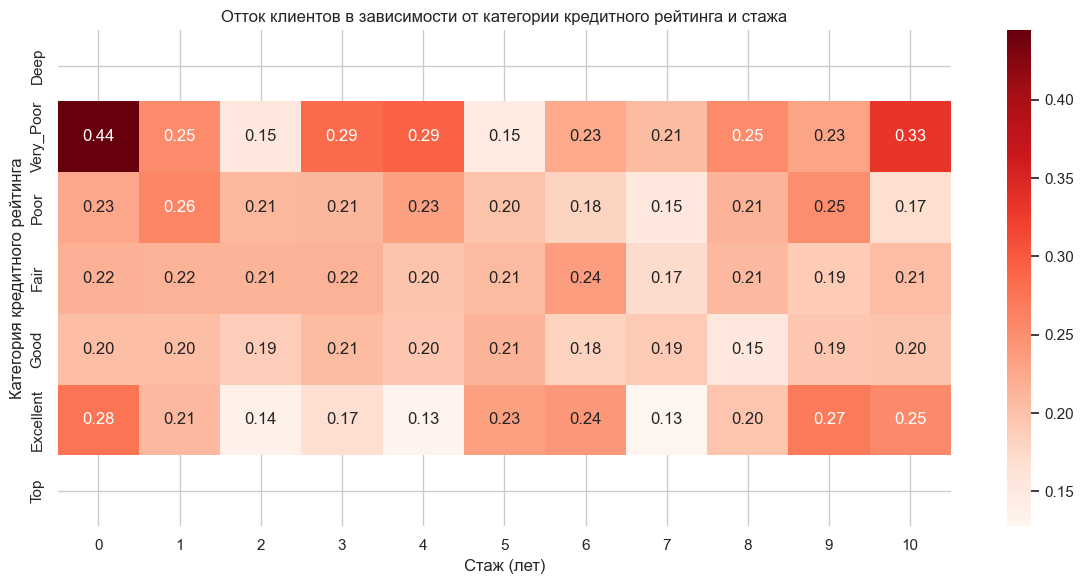

In [111]:
# Построение тепловой карты
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt=".2f")

plt.title('Отток клиентов в зависимости от категории кредитного рейтинга и стажа')
plt.xlabel('Стаж (лет)')
plt.ylabel('Категория кредитного рейтинга')
plt.tight_layout()
plt.show()

Вывод:

Самая высокая доля оттока — у клиентов с низким кредитным рейтингом (Very_Poor, Poor) и высоким стажем.

Также видно, что даже среди клиентов с рейтингом Good и Fair есть уходящие — особенно с определённым стажем (например, 3–6 лет).

Возможные причины:

Клиенты с плохим рейтингом могли не получать выгодные условия → уходим.

Долгий стаж + низкий рейтинг = накопленное недовольство.

Банку стоит улучшить условия лояльности для таких категорий и предложить рефинансирование или персональные программы поддержки.